1. Load data
2. Clean data
3. Split data
4. Train model
5. Evaluate model
6. Save model


In [214]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [215]:
'''# data scaping and loading 
import pandas as pd
import yfinance as yf
sp500=yf.Ticker("^GSPC")
sp500=sp500.history(period="max") '''


'# data scaping and loading \nimport pandas as pd\nimport yfinance as yf\nsp500=yf.Ticker("^GSPC")\nsp500=sp500.history(period="max") '

In [216]:
#data=sp500

In [217]:
#data.to_csv("sp500.csv")

In [218]:
df=pd.read_csv('C:/Users/hp/Desktop/small projects/stock market using Linear/data/sp500.csv')

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24594 entries, 0 to 24593
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          24594 non-null  object 
 1   Open          24594 non-null  float64
 2   High          24594 non-null  float64
 3   Low           24594 non-null  float64
 4   Close         24594 non-null  float64
 5   Volume        24594 non-null  int64  
 6   Dividends     24594 non-null  float64
 7   Stock Splits  24594 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.5+ MB


<Axes: xlabel='Date'>

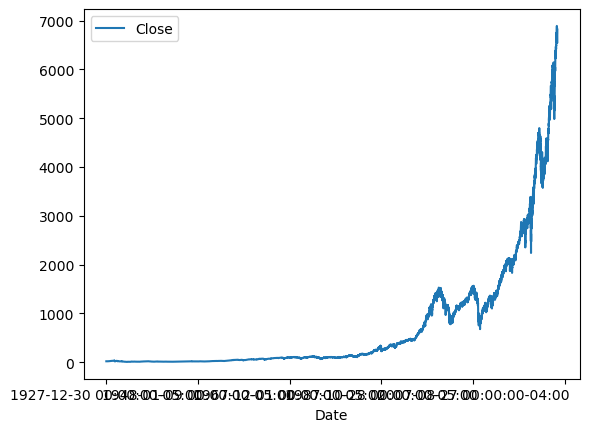

In [220]:
df.plot.line(y="Close",x='Date')

In [221]:
del df['Dividends']
del df['Stock Splits']

In [222]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


In [223]:
df ['Tommorow']= df['Close'].shift(-1)

In [224]:
df['target']=(df['Tommorow'] > df['Close']).astype(int)

In [225]:
df

,Date,Open,High,Low,Close,Volume,Tommorow,target
0,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
2,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
3,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
4,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...,...
24589,2025-11-20 00:00:00-05:00,6737.930176,6770.350098,6534.049805,6538.759766,5596080000,6602.990234,1
24590,2025-11-21 00:00:00-05:00,6555.770020,6660.049805,6521.919922,6602.990234,5929930000,6705.120117,1
24591,2025-11-24 00:00:00-05:00,6636.540039,6715.750000,6630.700195,6705.120117,6039740000,6765.879883,1
24592,2025-11-25 00:00:00-05:00,6697.029785,6776.399902,6659.979980,6765.879883,5003330000,6812.609863,1


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24594 entries, 0 to 24593
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      24594 non-null  object 
 1   Open      24594 non-null  float64
 2   High      24594 non-null  float64
 3   Low       24594 non-null  float64
 4   Close     24594 non-null  float64
 5   Volume    24594 non-null  int64  
 6   Tommorow  24593 non-null  float64
 7   target    24594 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 1.5+ MB


In [227]:
X = df[['Open', 'High', 'Low', 'Close', 'Volume','Tommorow']]
y = df['target']

In [228]:
X=X.dropna()

In [229]:
X.shape

(24593, 6)

In [230]:
y=y.drop(y.index[-1])


In [231]:
y.value_counts()

target
1    12898
0    11695
Name: count, dtype: int64

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [233]:
model_RF=RandomForestClassifier(n_estimators=100, random_state=42)

In [234]:
model_RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [235]:
y_pred=model_RF.predict(X_test)

In [236]:
accuracy_score(y_test, y_pred)

0.8125924100542139

# using grid scearch cv

In [237]:
from sklearn.model_selection import GridSearchCV

In [238]:
classi=GridSearchCV((model_RF),{
    'n_estimators': [50, 100] ,
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10,  None],
},cv=2,verbose=2,return_train_score=True)

In [239]:
classi.fit(X_train, y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.8s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.8s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   1.8s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   1.8s
[CV] END ...max_depth=10, max_features=log2, n_estimators=50; total time=   0.8s
[CV] END ...max_depth=10, max_features=log2, n_estimators=50; total time=   0.9s
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   1.8s
[CV] END ..max_depth=10, max_features=log2, n_estimators=100; total time=   1.9s
[CV] END .max_depth=None, max_features=sqrt, n_estimators=50; total time=   2.4s
[CV] END .max_depth=None, max_features=sqrt, n_estimators=50; total time=   2.9s
[CV] END max_depth=None, max_features=sqrt, n_estimators=100; total time=   4.9s
[CV] END max_depth=None, max_features=sqrt, n_est

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100]},
             return_train_score=True, verbose=2)

In [240]:
y_pred_GS=classi.predict(X_test)

In [241]:
accuracy_score(y_test, y_pred_GS)

0.8125924100542139

In [242]:
classi.best_params_

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}

In [243]:
classi.cv_results_

{'mean_fit_time': array([0.9126668 , 1.88219571, 0.94175065, 1.88805997, 2.68286204,
        5.10544753, 2.54277098, 4.96974313]),
 'std_fit_time': array([2.54821777e-03, 1.42574310e-04, 3.22567225e-02, 5.10970354e-02,
        2.76428223e-01, 2.54259586e-01, 2.33348012e-01, 3.67158771e-01]),
 'mean_score_time': array([0.02402282, 0.04533315, 0.02468479, 0.04267156, 0.08151996,
        0.15589583, 0.07876647, 0.16131413]),
 'std_score_time': array([0.00188875, 0.00025654, 0.0012325 , 0.00105464, 0.00126493,
        0.00287545, 0.00411379, 0.004233  ]),
 'param_max_depth': masked_array(data=[10, 10, 10, 10, None, None, None, None],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'param_max_features': masked_array(data=['sqrt', 'sqrt', 'log2', 'log2', 'sqrt', 'sqrt', 'log2',
                    'log2'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=n

In [244]:
classi.best_score_

np.float64(0.7512900586717388)

# Random search CV

In [245]:
from sklearn.model_selection import RandomizedSearchCV 
import numpy as np
import random


In [246]:
classi_2=RandomizedSearchCV((model_RF),{
   'n_estimators':range(50, 100),
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 5),
    'min_samples_leaf': range(1, 5),
    'criterion': ['gini', 'entropy']
},cv=2,verbose=1,return_train_score=True)

In [247]:
classi_2.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 10),
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(2, 5),
                                        'n_estimators': range(50, 100)},
                   return_train_score=True, verbose=1)

In [248]:
y_pred_rc=classi_2.predict(X_test)

In [249]:
X_test.shape

(8116, 6)

In [250]:
y_pred_GS.shape

(8116,)

In [251]:
accuracy_score(y_test, y_pred_rc)

0.5913011335633317

In [252]:
classi_2.best_params_

{'n_estimators': 94,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 9,
 'criterion': 'entropy'}

In [253]:
classi_2.best_score_

np.float64(0.5815983399673526)

# using stacking


In [254]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [255]:
base_model=[
    ('dt',DecisionTreeClassifier()),
    ('svm',SVC()),
    ('rf',RandomForestClassifier())
]

In [256]:
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X, y, test_size=0.2, random_state=42)

In [257]:
meta_model=LogisticRegression(max_iter=1000)
Stacking_clf=StackingClassifier(
    estimators=base_model,
    final_estimator=meta_model,
    cv=5
)

In [258]:
print(X_train_st.isna().sum())
print(y_train_st.shape)

Open        0
High        0
Low         0
Close       0
Volume      0
Tommorow    0
dtype: int64
(19674,)


In [259]:
Stacking_clf.fit(X_train_st,y_train_st)

StackingClassifier(cv=5,
                   estimators=[('dt', DecisionTreeClassifier()), ('svm', SVC()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression(max_iter=1000))

In [269]:
y_pred_stack=Stacking_clf.predict(X_test_st)

In [270]:
accuracy_score(y_test_st,y_pred_stack)

0.8330961577556414

In [271]:
confusion_matrix(y_test_st,y_pred_stack)

array([[1912,  455],
       [ 366, 2186]])